<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/8_2_Transformation_rules_Enumeration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enumeration of chemical libraries using transformation rules**

---

Made by: Fernanda Saldivar and Karen Pelcastre

Contact: fer.saldivarg@gmail.com

**Last Update:** March 2025


#Content
---

>[Enumeration of chemical libraries using transformation rules](#scrollTo=8EhqDpUjTMk_)

>[Content](#scrollTo=3P989Eik42Nk)

>[Objectives](#scrollTo=9scuUEomS_h3)

>[Introduction](#scrollTo=u5VoFGArx21D)

>[Preparation of the environment](#scrollTo=mY72zy803Sdf)

>[Exercises](#scrollTo=dM4AFnzR5ZBJ)

>>[Build specific SMARTS for each transformation](#scrollTo=oqi-qPsBV1af)

>>[Define the function to generate the new compounds](#scrollTo=9mQu6Ph2V_-9)

>[For more information:](#scrollTo=ecQx6TMuTX_A)



#Objectives
---
* Get knowledge in the use of SMARTS and SMIRKS to codify information present in the scientific literature about chemical transformations.
* Ilustrate the enumeration of virtual chemical libraries through an apporach based in chemical transformations.


#Introduction
---
An approach that can help explore chemistry around the first identified hits in a drug design process is using transformation rules obtained empirically or through systematic identification using chemoinformatic methods. This approach can help to overcome problems associated with the properties of the compounds and identify opportunities to break patents through the expansion of chemistry around the first compounds.

Some transformation rules in pharmaceutical chemistry can be associted to improve the following parameters:

* Molecular properties (shape and conformation, MW, Fsp3, etc.)
* Physicochemical parameters (lipophilicity, solubility, etc.)
* Pharmacological parameters (*in vitro* potency, selectivity against isoforms,  *in vivo* efficacy, etc.)
* ADME parameters (metabolic stability,  CYP450 inhibition, PPB, etc.)
* Security and toxicity parameters (formation of reactive metabolites, hepatotoxicity, mutagenicity, etc.)
* Other parameters (structural diversity, bioisoster)

An advantage of a transformation rules-based approach is that the general structures tend to be more relevant, since transformations are based on historical precedents. However, chemical diversity that can be explored can be more limited than a *novo* approach that uses generative methods. This is because the generation of compounds through transformation rules is restricted by the library of transformation to apply. Also, there is no guarantee that the generated compounds can be easily synthesized from available reagents.


# Preparation of the environment
---

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 26.1 MB/s eta 0:00:00


In [ ]:
!pip install faerun-notebook==0.1.5b0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.0/535.0 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.2-py2.py3-none-any.whl (1.6 MB)
  Created wheel for faerun-notebook: filename=faerun_notebook-0.1.5b0-py2.py3-none-any.whl size=470206 sha256=dc8721d1d5e012a45351395eec2e88db7d38a8451903bcbfcb1b8587d6efae3a
  Stored in directory: /root/.cache/pip/wheels/d7/62/68/a4047bcd112e913e0e3d0095edc67419d1d75aa56e1703ef9c
Successfully built faerun-notebook


In [ ]:
import pandas as pd
import rdkit as rk
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

# Exercises
---


Build SMIRKS that describe isosteric changes in the phenyl group and apply them to a set of compounds to generate new chemical structures. Examples of these transformations are described in **Figure 1**. To learn more about isosteric changes of the phenyl group go to: [*J. Med. Chem.* 2021, 64, 19, 14046–14128](https://pubs.acs.org/doi/10.1021/acs.jmedchem.1c01215)

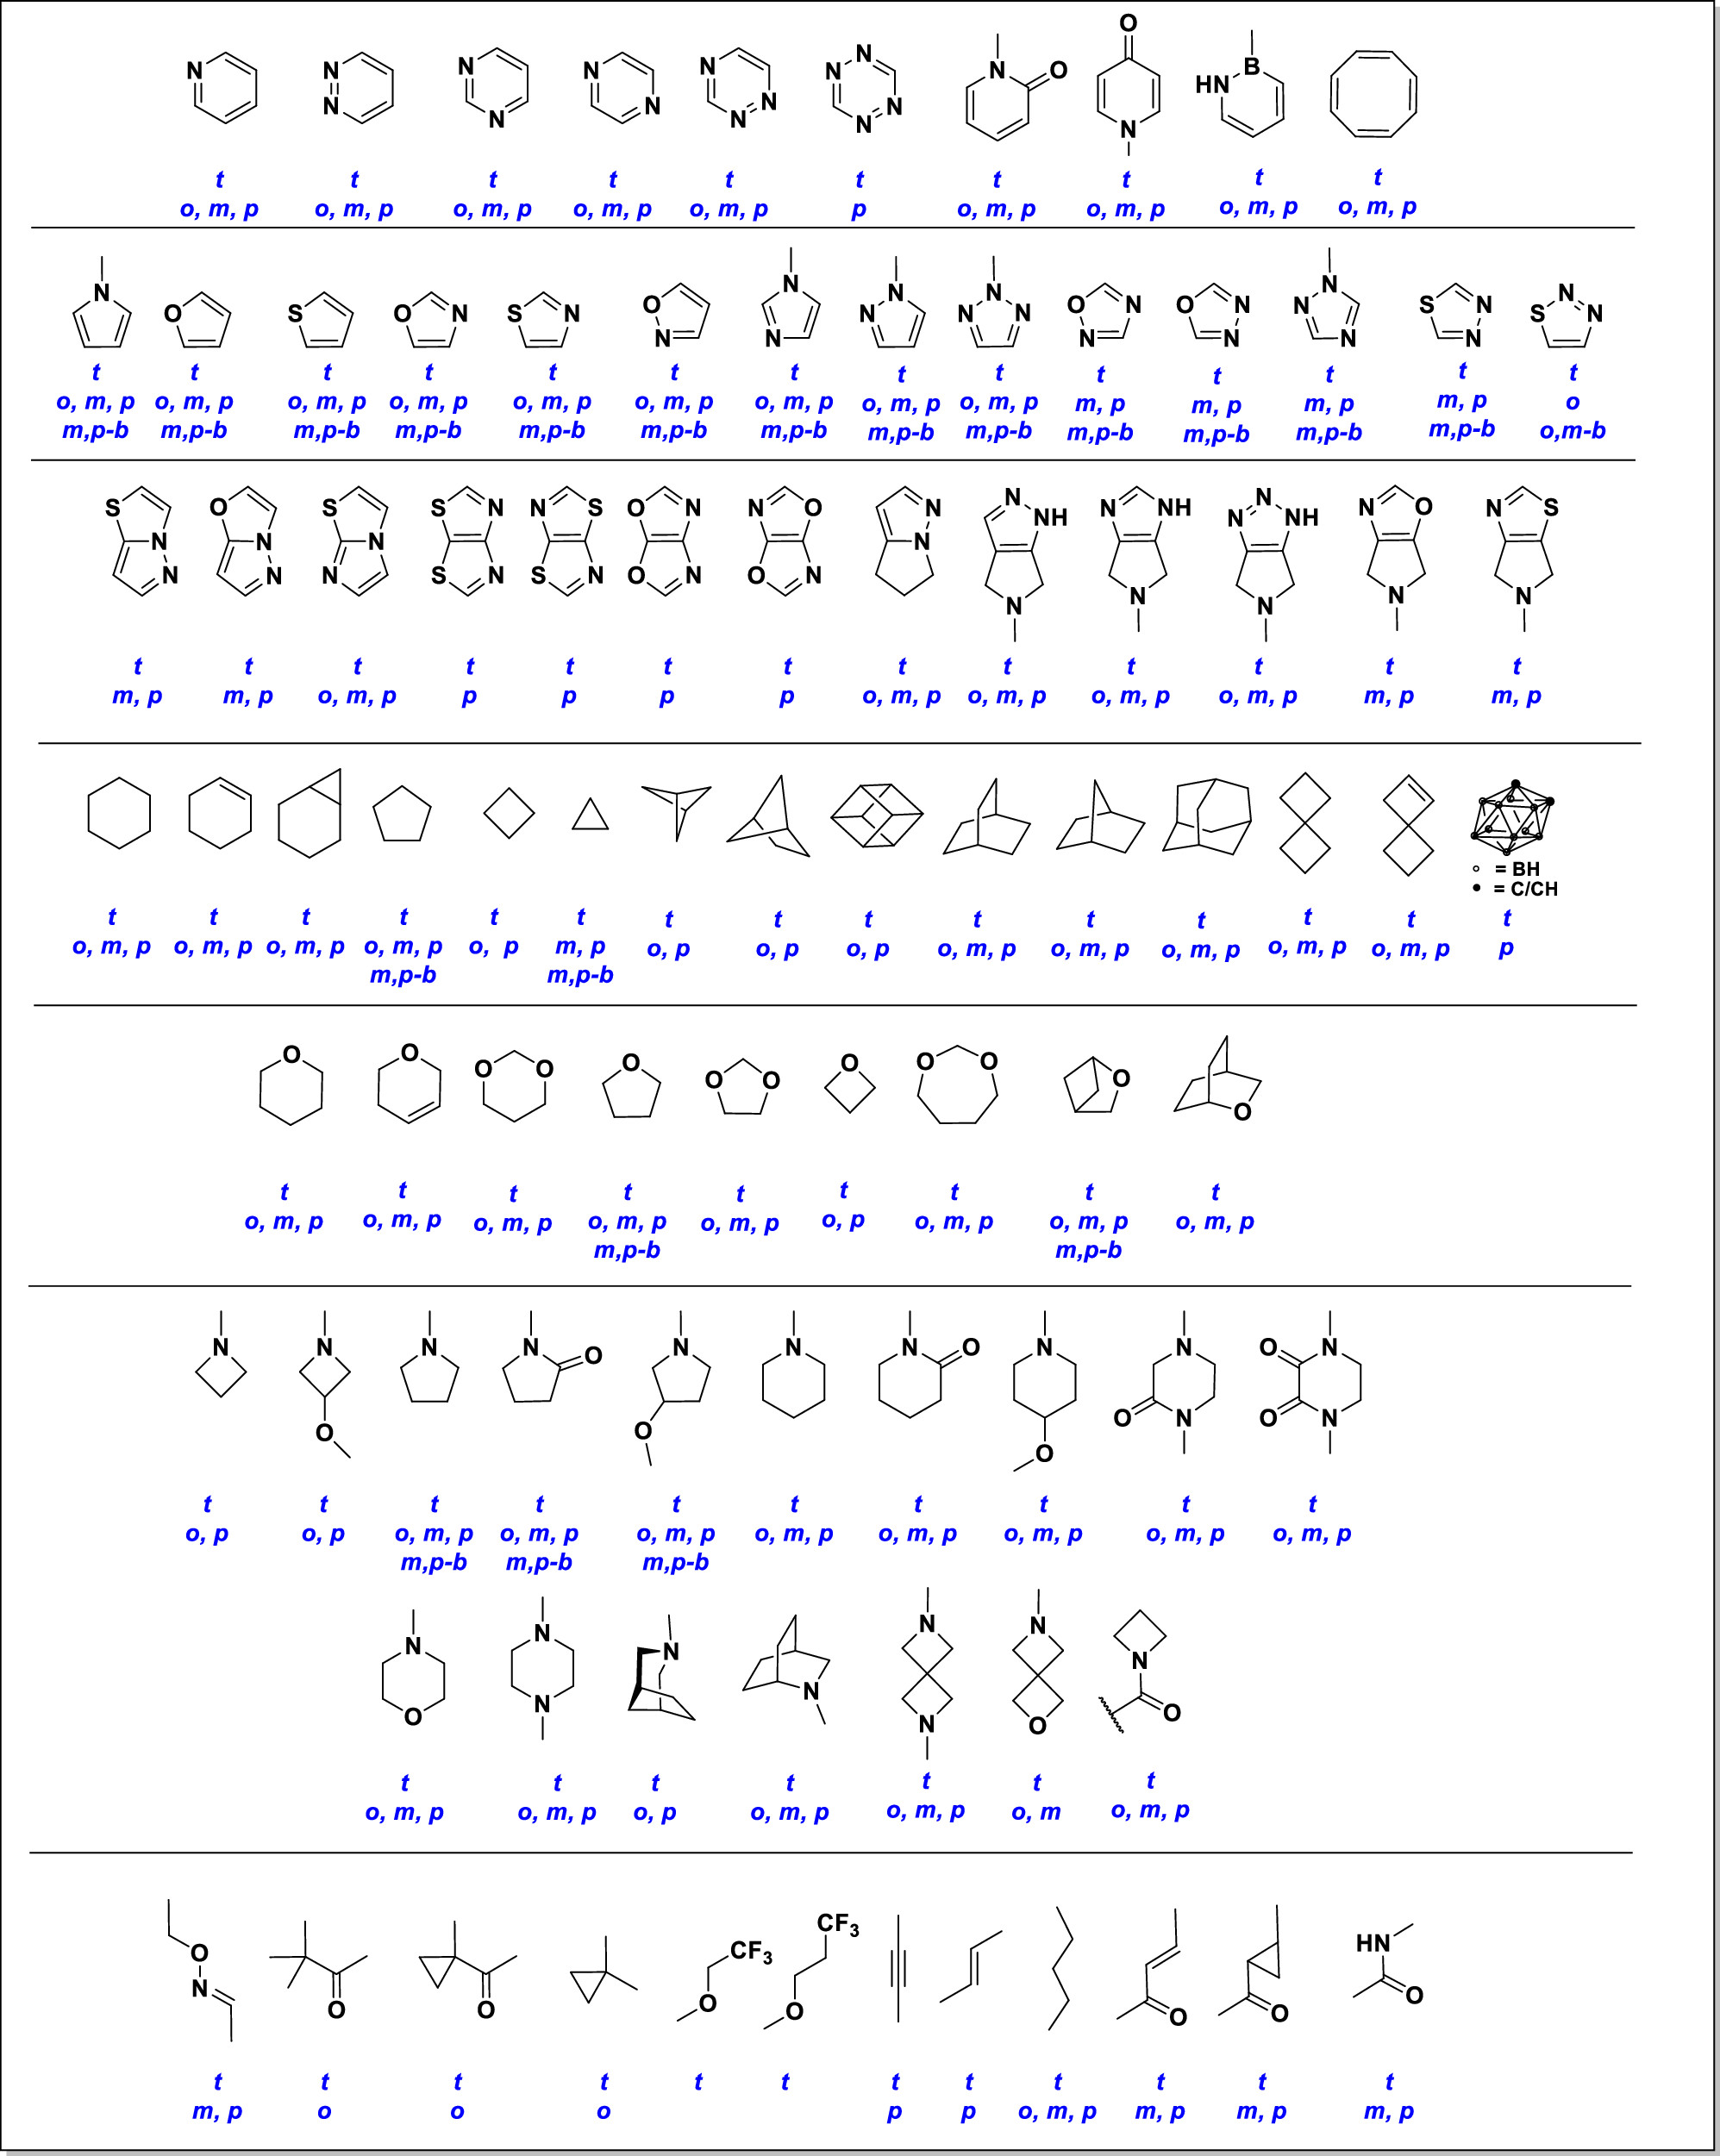



##1. Build specific SMARTS for each transformation

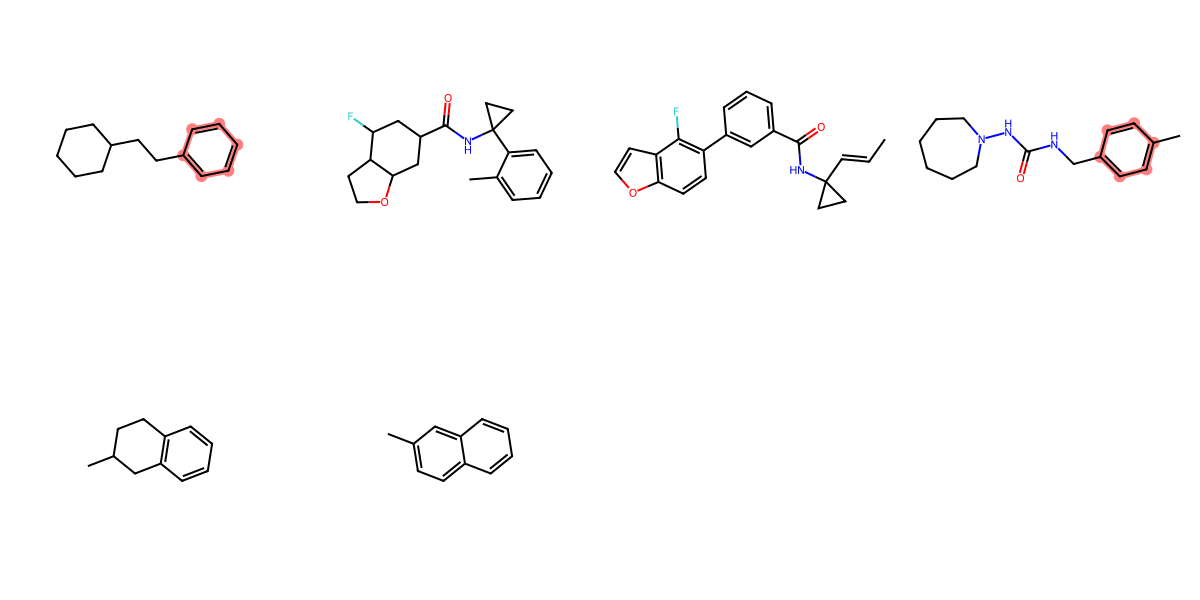

In [ ]:
#Check SMARTS
smiles_list2 = ['C(CC1=CC=CC=C1)C1CCCCC1', 'CC1=CC=CC=C1C1(CC1)NC(=O)C1CC2OCCC2C(F)C1', 'C\C=C\C1(CC1)NC(=O)C1=CC=CC(=C1)C1=C(F)C2=C(OC=C2)C=C1','CC1=CC=C(CNC(=O)NN2CCCCCC2)C=C1', 'CC1CCC2=C(C1)C=CC=C2','CC1=CC=C2C=CC=CC2=C1' ]
#'CCCC1=CC(CC)=CC(C)=C1'
mol_list = []
for smiles in smiles_list2:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)



pattern2 = Chem.MolFromSmarts ('[c;x2:1]1[c;x2D2:6][c;x2D2:5][c;x2:4][c;x2D2:3][c;x2D2:2]1') #Terminal and stop

#pattern2 = Chem.MolFromSmarts ('[c;D2]1[c;x2:2][c;x2:3][c;x2:4][c;x2:5][c;x2:1]1')
img2 = Draw.MolsToGridImage( mol_list, subImgSize=(300,300), molsPerRow=4, highlightAtomLists=[mol.GetSubstructMatch(pattern2) for mol in mol_list], useSVG=True )
img2

Note that in **Figure 1**, the described transformations to the phenyl group can have certain specifications and depend on the substitution patterns.

Here we show some examples of SMARTS that identify some of these specifications:


**terminal_phenyl_meta:** `[*:7]-[c;x2:1]1[c;x2D2:6][c;x2D2:5][c;x2D2:4][c;x2:3](-[*:8])[c;x2D2:2]1`

**phenyl__para**: `[c;x2:1]1[c;x2D2:6][c;x2D2:5][c;x2:4][c;x2D2:3][c;x2D2:2]1`

**terminal_phenyl_ortho:** `[c;x2:1]1[c;x2:2][c;x2D2:3][c;x2D2][c;x2D2:4][c;x2D2:5]1`

**terminal_phenyl_ortho_para:** `[c;x2]1[c;x2:1][c;x2][c;x2:2][c;x2][c;x2]1`


Phenyl (t, o, m, p) to Pyridazine

In [ ]:
SmilesDrawer(value="C1=CC=CC=C1>>c1ccnnc1 |c:0,2,4|", theme='matrix', background="#000000", options={'scale': 1.5, 'bondThickness': 2.5})

SmilesDrawer(background='#000000', options={'scale': 1.5, 'bondThickness': 2.5}, theme='matrix', value='C1=CC=…

## 2. Define the function to generate the new compounds


Number of unique product sets: 9


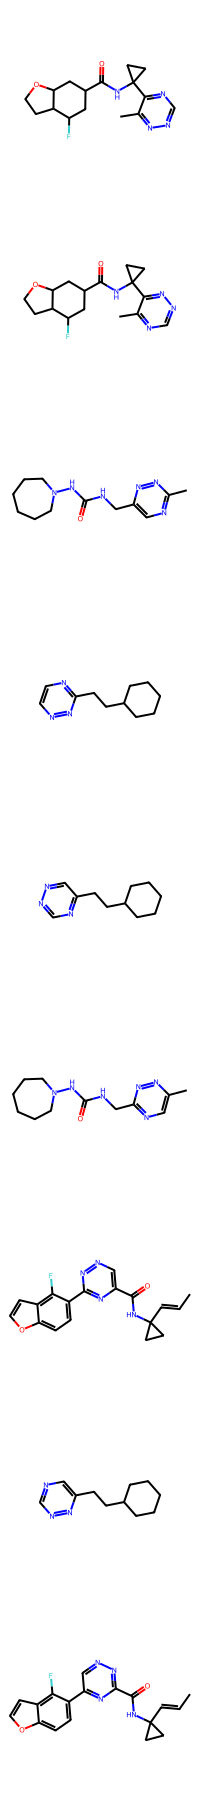

In [ ]:
from itertools import chain


def to_smiles(mol_tuple):
    return tuple(Chem.MolToSmiles(mol) for mol in mol_tuple)

def from_smiles(smiles_tuple):
    return tuple(Chem.MolFromSmiles(smiles) for smiles in smiles_tuple)

phenyl_to_pyridazine_smarts = '[c;D2:4]1[c;x2:5][c;x2:6][c;D2:1][c;x2:2][c;D2:3]1>>[c;x2:6]1[c;x2:5][n:4][n:3][c;x2:2][n;x2:1]1'
phenyl_to_pyridazine = AllChem.ReactionFromSmarts(phenyl_to_pyridazine_smarts)


all_products_tuples = [phenyl_to_pyridazine.RunReactants((mol, )) for mol in mol_list]
all_products = chain.from_iterable(all_products_tuples)
all_products_smiles = [to_smiles(mol_tuple) for mol_tuple in all_products]
all_products_unique = [from_smiles(smiles_tuple) for smiles_tuple in set(all_products_smiles)]
nProductSets = len(all_products_unique)
print("Number of unique product sets:",nProductSets)
# draw each product set on its own line
prod_tpl = tuple(chain(*all_products_unique))
img3= Draw.MolsToGridImage(prod_tpl,molsPerRow=phenyl_to_pyridazine.GetNumProductTemplates())
img3

Phenyl to trifluoroethoxy

In [ ]:
SmilesDrawer(value= "*C1=CC=CC=C1>>FC(F)(F)CCO* |c:3,5,t:1|", theme='matrix', background="#000000", options={'scale': 1.5, 'bondThickness': 2.5})

SmilesDrawer(background='#000000', options={'scale': 1.5, 'bondThickness': 2.5}, theme='matrix', value='*C1=CC…

Number of unique product sets: 1


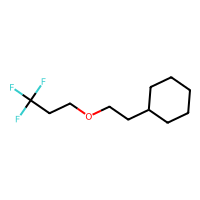

In [ ]:
from itertools import chain


def to_smiles(mol_tuple):
    return tuple(Chem.MolToSmiles(mol) for mol in mol_tuple)

def from_smiles(smiles_tuple):
    return tuple(Chem.MolFromSmiles(smiles) for smiles in smiles_tuple)

phenyl_to_OCCCF3_smarts = '[*:2]-[c;x2D3:1]1[c;x2D2][c;x2D2][c;x2D2][c;x2D2][c;x2D2]1>>FC(F)(F)[#6]-[#6]-[#8:1]-[*:2] |rb:1:2,2:2,3:2,4:2,5:2,6:2|'
phenyl_to_OCCCF3 = AllChem.ReactionFromSmarts(phenyl_to_OCCCF3_smarts)


all_products_tuples = [phenyl_to_OCCCF3.RunReactants((mol, )) for mol in mol_list]
all_products = chain.from_iterable(all_products_tuples)
all_products_smiles = [to_smiles(mol_tuple) for mol_tuple in all_products]
all_products_unique = [from_smiles(smiles_tuple) for smiles_tuple in set(all_products_smiles)]
nProductSets = len(all_products_unique)
print("Number of unique product sets:",nProductSets)
# draw each product set on its own line
prod_tpl = tuple(chain(*all_products_unique))
img3=Draw.MolsToGridImage(prod_tpl,molsPerRow=phenyl_to_OCCCF3.GetNumProductTemplates())
img3

**Figure 1.** Isosteric changes in the phenyl group. [*J. Med. Chem.* 2021, 64, 19, 14046–14128](https://pubs.acs.org/doi/10.1021/acs.jmedchem.1c01215)

---
#For more information:

* Rarey, M., Nicklaus, M. C., and Warr, W. (2022). S[pecial Issue on Reaction Informatics and Chemical Space.](https://pubs.acs.org/doi/10.1021/acs.jcim.2c00390) *J. Chem. Inf. Model.* 62:2009–2010.
* Saldívar-González FI, Navarrete-Vázquez G,  Medina-Franco JL. (2023) [Design of a multi-target focused library for antidiabetic targets using a comprehensive set of chemical transformation rules.](https://www.frontiersin.org/articles/10.3389/fphar.2023.1276444/full) *Front. Pharmacol.* 14, 1276444.
* Subbaiah, M. A. M., and Meanwell, N. A. (2021). [Bioisosteres of the Phenyl Ring: Recent Strategic Applications in Lead Optimization and Drug Design.](https://pubs.acs.org/doi/10.1021/acs.jmedchem.1c01215) *J. Med. Chem.* 64, 14046–14128.
* Yang T, Li Z, Chen Y, Feng D, Wang G, Fu Z, Ding X, Tan X, Zhao J, Luo X, Chen K, Jiang H, Zheng M. [DrugSpaceX: a large screenable and synthetically tractable database extending drug space.](https://academic.oup.com/nar/article/49/D1/D1170/5940503?login=false) *Nucleic Acids Res*. 8;49(D1):D1170-D1178.
